In [1]:
import os
os.chdir("../..")

In [2]:
import torchvision.transforms as transforms
import numpy as np
import torch
import os
import torch.utils.data as data
import cv2
from PIL import Image
from datasets.augment import cc_augment
from utils.entropy_loss import get_guassian_heatmaps_from_ref
# from skimage.filters.rank import entropy
from scipy.stats import entropy
from skimage.morphology import disk
# from tutils import tfilename, torchvision_save
from skimage.exposure import histogram
from einops import rearrange



In [3]:
from datasets.ceph.ceph_ssl_entropy import Cephalometric

dataset = Cephalometric(pathDataset="/home1/quanquan/datasets/Cephalometric",entr_map_dir="/home1/quanquan/datasets/Cephalometric/entr_ks_128")
dataset.entr_map_from_image()

  0%|          | 0/150 [00:00<?, ?it/s]

Using new ret Function!
Get entropy maps!


/home1/quanquan/code/landmark/code/tproj/datasets/ceph/ceph_ssl_entropy.py:245: RuntimeWarning: invalid value encountered in double_scalars
  entr_per = bi_entr.sum() / bi_select.sum()
100%|██████████| 150/150 [50:57<00:00, 20.38s/it]

mean select percentage:  0.0


(nan, 0.0)

196


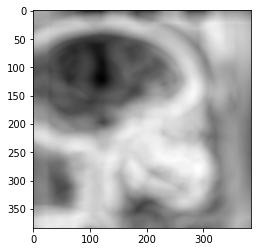

In [12]:
%matplotlib inline
import matplotlib.pylab as plt
import cv2
dirname = "/home1/quanquan/datasets/Cephalometric/entr_ks_128/"
# print(os.listdir(dirname))
im_path = os.path.join(dirname, "26.npy")
data = np.load(im_path)
data = (data / 10.  * 255).astype(int)
cv2.imwrite("entr_ks_128.png", data)
print(data.max())
plt.imshow(data, cmap='gray')
# plt.savefig("entr_ks_128.png")

['47.npy', '124.npy', '149.npy', '37.npy', '18.npy', '53.npy', '112.npy', '121.npy', '39.npy', '59.npy', '143.npy', '77.npy', '68.npy', '1.npy', '103.npy', '113.npy', '5.npy', '62.npy', '107.npy', '8.npy', '147.npy', '52.npy', '129.npy', '36.npy', '44.npy', '41.npy', '88.npy', '138.npy', '82.npy', '78.npy', '67.npy', '114.npy', '135.npy', '150.npy', '137.npy', '20.npy', '61.npy', '17.npy', '85.npy', '87.npy', '97.npy', '57.npy', '27.npy', '79.npy', '29.npy', '101.npy', '109.npy', '128.npy', '14.npy', '111.npy', '106.npy', '89.npy', '133.npy', '123.npy', '73.npy', '34.npy', '6.npy', '71.npy', '144.npy', '3.npy', '74.npy', '119.npy', '96.npy', '63.npy', '4.npy', '43.npy', '64.npy', '50.npy', '127.npy', '10.npy', '110.npy', '51.npy', '11.npy', '19.npy', '32.npy', '122.npy', '33.npy', '24.npy', '125.npy', '116.npy', '83.npy', '99.npy', '142.npy', '98.npy', '104.npy', '58.npy', '76.npy', '115.npy', '42.npy', '80.npy', '31.npy', '131.npy', '126.npy', '108.npy', '49.npy', '148.npy', '70.npy',

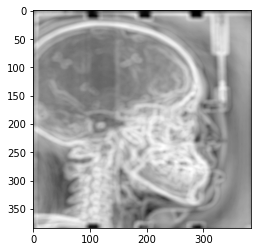

In [13]:
%matplotlib inline
import matplotlib.pylab as plt
dirname = "/home1/quanquan/datasets/Cephalometric/entr_ks_32/"
print(os.listdir(dirname))
im_path = os.path.join(dirname, "26.npy")
data = np.load(im_path)
data = (data / 10.  * 255).astype(int)
cv2.imwrite("entr_ks_32.png", data)
print(data.max())
plt.imshow(data, cmap='gray')

['47.npy', '124.npy', '149.npy', '37.npy', '18.npy', '53.npy', '112.npy', '121.npy', '39.npy', '59.npy', '143.npy', '77.npy', '68.npy', '1.npy', '103.npy', '113.npy', '5.npy', '62.npy', '107.npy', '8.npy', '147.npy', '52.npy', '129.npy', '36.npy', '44.npy', '41.npy', '88.npy', '138.npy', '82.npy', '78.npy', '67.npy', '114.npy', '135.npy', '150.npy', '137.npy', '20.npy', '61.npy', '17.npy', '85.npy', '87.npy', '97.npy', '57.npy', '27.npy', '79.npy', '29.npy', '101.npy', '109.npy', '128.npy', '14.npy', '111.npy', '106.npy', '89.npy', '133.npy', '123.npy', '73.npy', '34.npy', '6.npy', '71.npy', '144.npy', '3.npy', '74.npy', '119.npy', '96.npy', '63.npy', '4.npy', '43.npy', '64.npy', '50.npy', '127.npy', '10.npy', '110.npy', '51.npy', '11.npy', '19.npy', '32.npy', '122.npy', '33.npy', '24.npy', '125.npy', '116.npy', '83.npy', '99.npy', '142.npy', '98.npy', '104.npy', '58.npy', '76.npy', '115.npy', '42.npy', '80.npy', '31.npy', '131.npy', '126.npy', '108.npy', '49.npy', '148.npy', '70.npy',

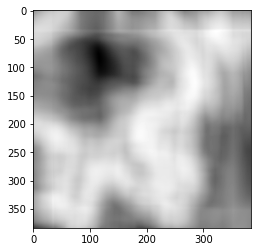

In [4]:
%matplotlib inline
import matplotlib.pylab as plt
# 
dirname = "/home1/quanquan/datasets/Cephalometric/entr_im_384/"
print(os.listdir(dirname))
im_path = os.path.join(dirname, "1.npy")
data = np.load(im_path)
plt.imshow(data, cmap='gray')

['47.npy', '124.npy', '149.npy', '37.npy', '18.npy', '53.npy', '112.npy', '121.npy', '39.npy', '59.npy', '143.npy', '77.npy', '68.npy', '1.npy', '103.npy', '113.npy', '5.npy', '62.npy', '107.npy', '8.npy', '147.npy', '52.npy', '129.npy', '36.npy', '44.npy', '41.npy', '88.npy', '138.npy', '82.npy', '78.npy', '67.npy', '114.npy', '135.npy', '150.npy', '137.npy', '20.npy', '61.npy', '17.npy', '85.npy', '87.npy', '97.npy', '57.npy', '27.npy', '79.npy', '29.npy', '101.npy', '109.npy', '128.npy', '14.npy', '111.npy', '106.npy', '89.npy', '133.npy', '123.npy', '73.npy', '34.npy', '6.npy', '71.npy', '144.npy', '3.npy', '74.npy', '119.npy', '96.npy', '63.npy', '4.npy', '43.npy', '64.npy', '50.npy', '127.npy', '10.npy', '110.npy', '51.npy', '11.npy', '19.npy', '32.npy', '122.npy', '33.npy', '24.npy', '125.npy', '116.npy', '83.npy', '99.npy', '142.npy', '98.npy', '104.npy', '58.npy', '76.npy', '115.npy', '42.npy', '80.npy', '31.npy', '131.npy', '126.npy', '108.npy', '49.npy', '148.npy', '70.npy',

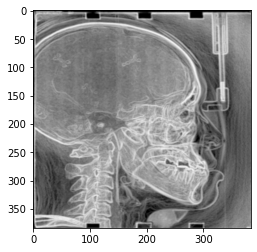

In [14]:
%matplotlib inline
import matplotlib.pylab as plt
# 
dirname = "/home1/quanquan/datasets/Cephalometric/entr1/train"
print(os.listdir(dirname))
im_path = os.path.join(dirname, "26.npy")
data = np.load(im_path)
data = (data / 10.  * 255).astype(int)
cv2.imwrite("entr_ks_10.png", data)
print(data.max())
plt.imshow(data, cmap='gray')

['47.npy', '124.npy', '149.npy', '37.npy', '18.npy', '53.npy', '112.npy', '121.npy', '39.npy', '59.npy', '143.npy', '77.npy', '68.npy', '1.npy', '103.npy', '113.npy', '5.npy', '62.npy', '107.npy', '8.npy', '147.npy', '52.npy', '129.npy', '36.npy', '44.npy', '41.npy', '88.npy', '138.npy', '82.npy', '78.npy', '67.npy', '114.npy', '135.npy', '150.npy', '137.npy', '20.npy', '61.npy', '17.npy', '85.npy', '87.npy', '97.npy', '57.npy', '27.npy', '79.npy', '29.npy', '101.npy', '109.npy', '128.npy', '14.npy', '111.npy', '106.npy', '89.npy', '133.npy', '123.npy', '73.npy', '34.npy', '6.npy', '71.npy', '144.npy', '3.npy', '74.npy', '119.npy', '96.npy', '63.npy', '4.npy', '43.npy', '64.npy', '50.npy', '127.npy', '10.npy', '110.npy', '51.npy', '11.npy', '19.npy', '32.npy', '122.npy', '33.npy', '24.npy', '125.npy', '116.npy', '83.npy', '99.npy', '142.npy', '98.npy', '104.npy', '58.npy', '76.npy', '115.npy', '42.npy', '80.npy', '31.npy', '131.npy', '126.npy', '108.npy', '49.npy', '148.npy', '70.npy',

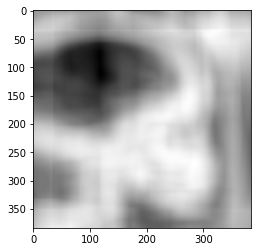

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
# 
dirname = "/home1/quanquan/datasets/Cephalometric/entr_64/train"
print(os.listdir(dirname))
im_path = os.path.join(dirname, "26.npy")
data = np.load(im_path)
print(data.shape)
plt.imshow(data, cmap='gray')

['47.npy', '124.npy', '149.npy', '37.npy', '18.npy', '53.npy', '112.npy', '121.npy', '39.npy', '59.npy', '143.npy', '77.npy', '68.npy', '1.npy', '103.npy', '113.npy', '5.npy', '62.npy', '107.npy', '8.npy', '147.npy', '52.npy', '129.npy', '36.npy', '44.npy', '41.npy', '88.npy', '138.npy', '82.npy', '78.npy', '67.npy', '114.npy', '135.npy', '150.npy', '137.npy', '20.npy', '61.npy', '17.npy', '85.npy', '87.npy', '97.npy', '57.npy', '27.npy', '79.npy', '29.npy', '101.npy', '109.npy', '128.npy', '14.npy', '111.npy', '106.npy', '89.npy', '133.npy', '123.npy', '73.npy', '34.npy', '6.npy', '71.npy', '144.npy', '3.npy', '74.npy', '119.npy', '96.npy', '63.npy', '4.npy', '43.npy', '64.npy', '50.npy', '127.npy', '10.npy', '110.npy', '51.npy', '11.npy', '19.npy', '32.npy', '122.npy', '33.npy', '24.npy', '125.npy', '116.npy', '83.npy', '99.npy', '142.npy', '98.npy', '104.npy', '58.npy', '76.npy', '115.npy', '42.npy', '80.npy', '31.npy', '131.npy', '126.npy', '108.npy', '49.npy', '148.npy', '70.npy',

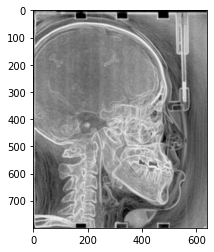

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
# 
dirname = "/home1/quanquan/datasets/Cephalometric/entr2/train"
print(os.listdir(dirname))
im_path = os.path.join(dirname, "26.npy")
data = np.load(im_path)
print(data.shape)
plt.imshow(data, cmap='gray')

In [ ]:
%matplotlib inline
import matplotlib.pylab as plt
# 
dirname = "/home1/quanquan/datasets/Cephalometric/entr/train"
print(os.listdir(dirname))
im_path = os.path.join(dirname, "26.npy")
data = np.load(im_path)
print(data.shape)
plt.imshow(data, cmap='gray')

[]


FileNotFoundError: [Errno 2] No such file or directory: '/home1/quanquan/datasets/Cephalometric/entr/train/26.npy'